In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import textwrap

In [ ]:
nRowsRead = None
data = pd.read_csv('/content/ad_10000records.csv', delimiter=',', nrows = nRowsRead)
data.dataframeName = 'Apply_Rate_2019.csv'
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10000 rows and 10 columns


In [ ]:
ad_topics = [
    "Freshly brewed coffee delivered to your door",
    "Comfortable running shoes for all terrains",
    "Affordable home cleaning services",
    "Latest smartphones at discount prices",
    "Organic fruits and vegetables near you",
    "Stylish backpacks for college students",
    "Quick healthy meal kits for busy people",
    "Relaxing spa and wellness treatments",
    "Reliable car servicing and repairs",
    "Trendy fashion wear for every season",
    "Smart TVs with unbeatable offers",
    "Budget-friendly travel packages",
    "Gym memberships with personal trainers",
    "Cozy furniture for modern homes",
    "High-speed internet plans in your area",
    "Insurance plans for your family’s safety",
    "Online courses to upgrade your skills",
    "Easy loans with low interest rates",
    "Latest gaming laptops at best prices",
    "Pet care products delivered to home"
]

# Randomly assign one of the new topics to each row
data["Ad Topic Line"] = np.random.choice(ad_topics, len(data))

# Save the updated dataset
data.to_csv("ctr_advertisement_dataset_dailylife.csv", index=False)

print("✅ Dataset updated with daily-life ad topics and saved as ctr_advertisement_dataset_dailylife.csv")


✅ Dataset updated with daily-life ad topics and saved as ctr_advertisement_dataset_dailylife.csv


In [ ]:
data.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Cozy furniture for modern homes,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Affordable home cleaning services,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Freshly brewed coffee delivered to your door,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Reliable car servicing and repairs,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Online courses to upgrade your skills,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [ ]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [ ]:
data=data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City','Country', 'Gender',
        'Clicked on Ad']]

In [ ]:
label='Clicked on Ad'

In [ ]:
data.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Country,Gender,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Cozy furniture for modern homes,Lisafort,Svalbard & Jan Mayen Islands,Male,0
1,41.73,31.0,61840.26,207.17,Affordable home cleaning services,West Angelabury,Singapore,Male,0
2,44.40,30.0,57877.15,172.83,Freshly brewed coffee delivered to your door,Reyesfurt,Guadeloupe,Female,0
3,59.88,28.0,56180.93,207.17,Reliable car servicing and repairs,New Michael,Zambia,Female,0
4,49.21,30.0,54324.73,201.58,Online courses to upgrade your skills,West Richard,Qatar,Female,1


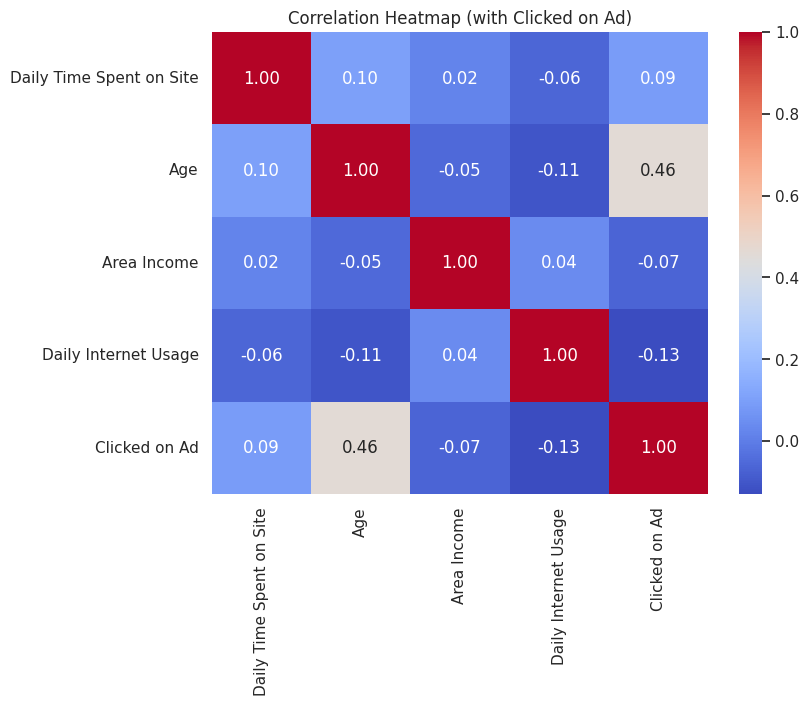

In [ ]:
numeric_cols = data.select_dtypes(include=["number"])

# Correlation matrix
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (with Clicked on Ad)")
plt.show()


Overall CTR: 49.17%

CTR by Age Group (%)
 Age Group
18-24    29.44
25-34    27.79
35-44    57.95
45+      86.47
Name: Clicked on Ad, dtype: float64

Top 10 Countries by CTR (%)
 Country
Antigua and Barbuda         100.0
Azerbaijan                  100.0
Central African Republic    100.0
Guinea-Bissau               100.0
Gambia                      100.0
Cayman Islands              100.0
Norfolk Island              100.0
Martinique                  100.0
Monaco                      100.0
Montserrat                  100.0
Name: Clicked on Ad, dtype: float64

Top 10 Cities by CTR (%)
 City
West Michaelstad     100.0
West Michaelhaven    100.0
West Jessicahaven    100.0
West David           100.0
West Dennis          100.0
West Courtney        100.0
Davidview            100.0
Cameronberg          100.0
West Lucas           100.0
West Ericfurt        100.0
Name: Clicked on Ad, dtype: float64

Top 10 Most Clicked Ad Topics (clicks)
 Ad Topic Line
Relaxing spa and wellness treatments        

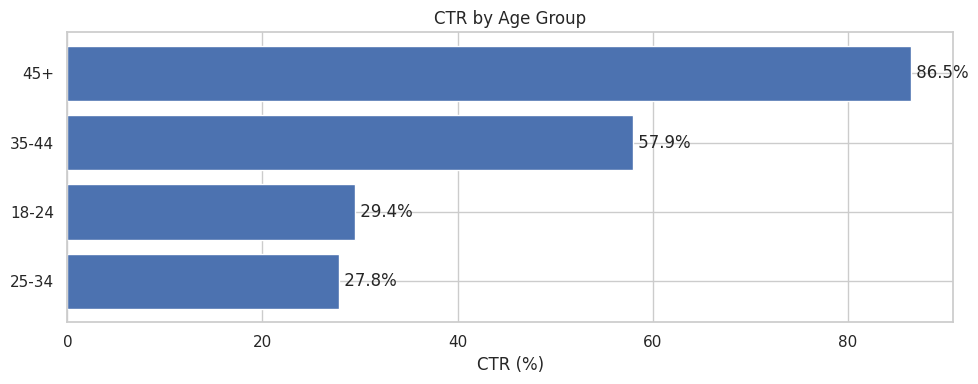

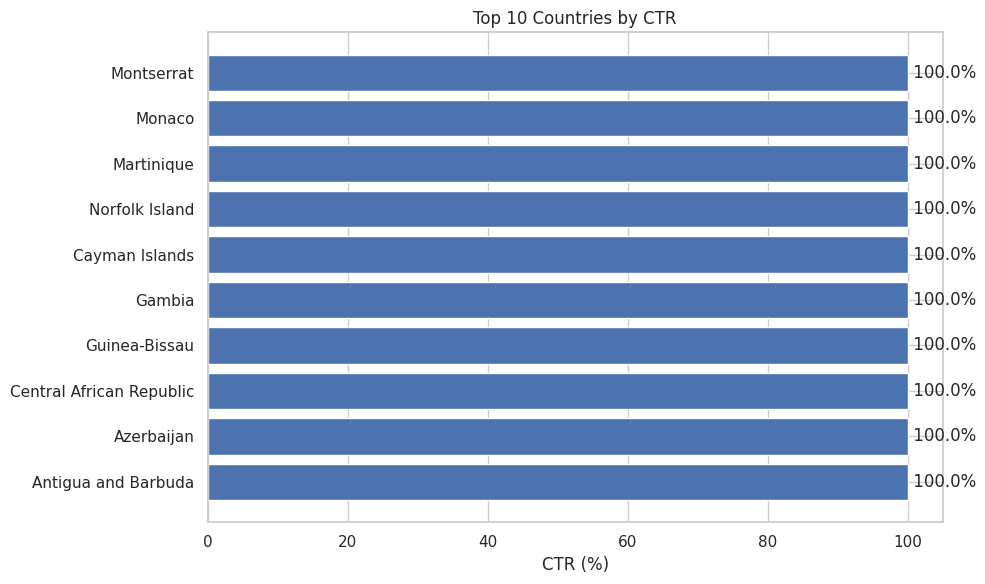

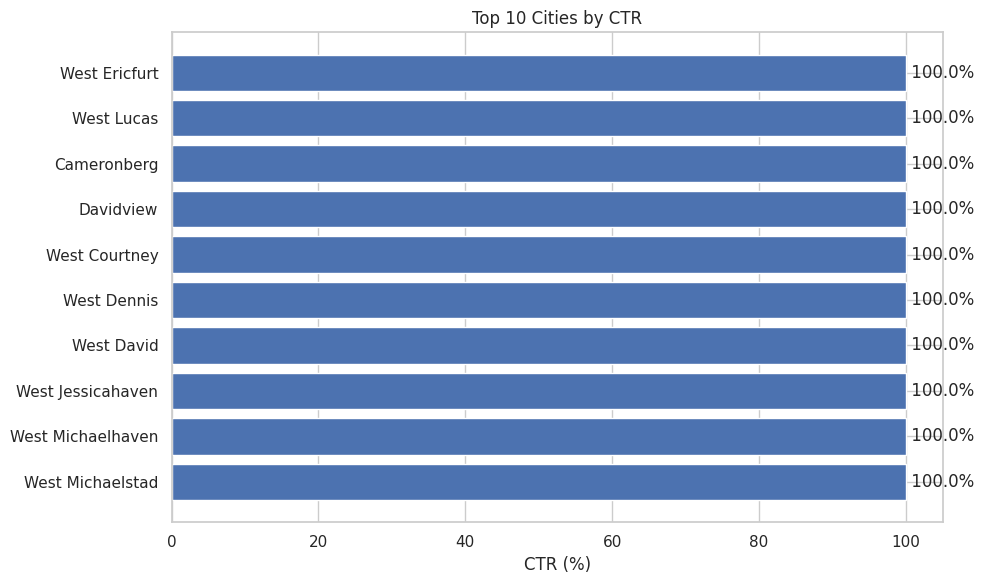

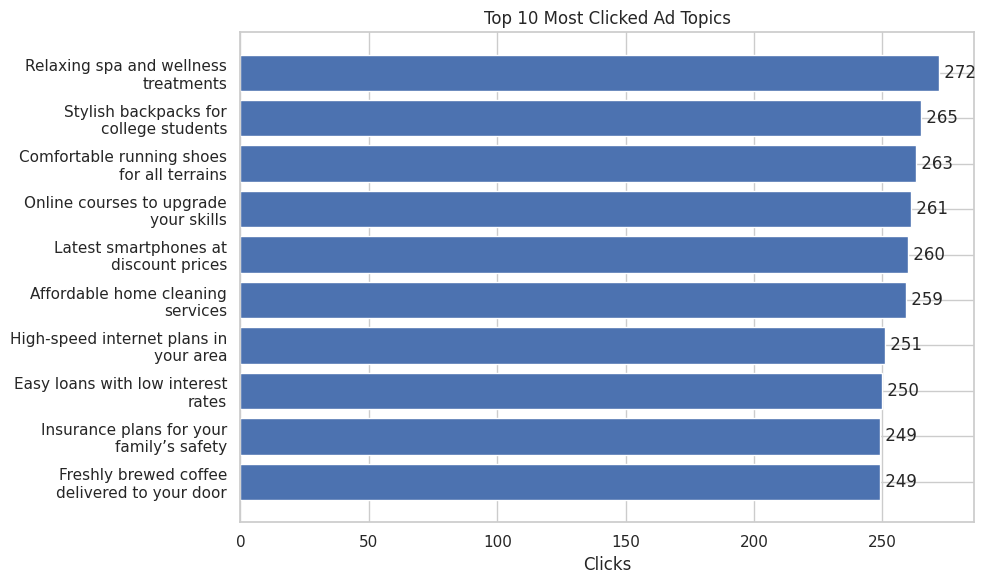

In [ ]:
# 2) CLEANUP: column names + numeric types
data.columns = data.columns.str.strip()
for col in ["Clicked on Ad", "Age"]:
    data[col] = pd.to_numeric(data[col], errors="coerce")
data = data.dropna(subset=["Clicked on Ad", "Age"])

# 3) OVERALL CTR
ctr_percentage = data["Clicked on Ad"].mean() * 100
print("Overall CTR: {:.2f}%".format(ctr_percentage))

# 4) AGE GROUPS (use 120 as safe upper bound so no age is dropped)
age_bins   = [18, 25, 35, 45, 120]
age_labels = ["18-24", "25-34", "35-44", "45+"]
data["Age Group"] = pd.cut(
    data["Age"],
    bins=age_bins,
    labels=age_labels,
    right=False,          # 18 <= age < 25 -> "18-24", etc.
    include_lowest=True
)

# 5) METRICS
ctr_by_age = data.groupby("Age Group", observed=True)["Clicked on Ad"].mean() * 100
ctr_by_country = (data.groupby("Country", dropna=False)["Clicked on Ad"]
                  .mean().mul(100).sort_values(ascending=False).head(10))
ctr_by_city = (data.groupby("City", dropna=False)["Clicked on Ad"]
               .mean().mul(100).sort_values(ascending=False).head(10))
most_clicked_ads = (data.loc[data["Clicked on Ad"] == 1, "Ad Topic Line"]
                    .value_counts().head(10))

# 6) PRINT SMALL TABLES (handy in interviews)
print("\nCTR by Age Group (%)\n", ctr_by_age.round(2))
print("\nTop 10 Countries by CTR (%)\n", ctr_by_country.round(2))
print("\nTop 10 Cities by CTR (%)\n", ctr_by_city.round(2))
print("\nTop 10 Most Clicked Ad Topics (clicks)\n", most_clicked_ads)

# 7) PLOTTING HELPERS (wrap long labels so full names are visible)
def wrap_labels(labels, width=28):
    return [textwrap.fill(str(l), width) for l in labels]

def barh_from_series(series, title, xlabel, show_pct=True):
    s = series.sort_values(ascending=True)
    labels = wrap_labels(s.index, 28)
    values = s.values

    fig, ax = plt.subplots(figsize=(10, max(4, len(s) * 0.6)))
    ax.barh(labels, values)
    ax.set_title(title)
    ax.set_xlabel(xlabel)

    # annotate
    for i, v in enumerate(values):
        ax.text(v, i, f" {v:.1f}%" if show_pct else f" {int(v)}", va="center")
    plt.tight_layout()
    plt.show()

# 8) PLOTS
barh_from_series(ctr_by_age,     "CTR by Age Group",        "CTR (%)",   show_pct=True)
barh_from_series(ctr_by_country, "Top 10 Countries by CTR", "CTR (%)",   show_pct=True)
barh_from_series(ctr_by_city,    "Top 10 Cities by CTR",    "CTR (%)",   show_pct=True)
barh_from_series(most_clicked_ads, "Top 10 Most Clicked Ad Topics", "Clicks", show_pct=False)


In [ ]:
cat_features=['Ad Topic Line','City','Gender','Country']

In [ ]:
continue_var=[ 'Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']

In [ ]:
from sklearn.preprocessing import LabelEncoder ,MinMaxScaler
mms = MinMaxScaler(feature_range=(0, 1))
data[continue_var] = mms.fit_transform(data[continue_var])

In [ ]:
train=data

In [ ]:
train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Country,Gender,Clicked on Ad,Age Group
0,0.508138,0.317073,0.849233,0.410404,Cozy furniture for modern homes,Lisafort,Svalbard & Jan Mayen Islands,Male,0,25-34
1,0.156416,0.292683,0.732274,0.618854,Affordable home cleaning services,West Angelabury,Singapore,Male,0,25-34
2,0.202159,0.268293,0.671617,0.410404,Freshly brewed coffee delivered to your door,Reyesfurt,Guadeloupe,Female,0,25-34
3,0.467363,0.219512,0.645655,0.618854,Reliable car servicing and repairs,New Michael,Zambia,Female,0,25-34
4,0.284564,0.268293,0.617245,0.584922,Online courses to upgrade your skills,West Richard,Qatar,Female,1,25-34


In [ ]:
data.drop(columns=["Age Group"],inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

for c in cat_features:
    le = LabelEncoder()
    le.fit(train[c].astype(str))
    train[c] = le.transform(train[c].astype(str))

In [ ]:
train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Country,Gender,Clicked on Ad
0,0.508138,0.317073,0.849233,0.410404,3,234,174,1,0
1,0.156416,0.292683,0.732274,0.618854,0,460,166,1,0
2,0.202159,0.268293,0.671617,0.410404,5,379,71,0,0
3,0.467363,0.219512,0.645655,0.618854,16,269,205,0,0
4,0.284564,0.268293,0.617245,0.584922,11,495,149,0,1


In [ ]:
features=list(train.columns)
features.remove(label)

## Train Data preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(train ,
                                   random_state=104,
                                   test_size=0.2,
                                   shuffle=True)
train, valid = train_test_split(train ,
                                   random_state=104,
                                   test_size=0.15,
                                   shuffle=True)

## Model Evaluation Metrics

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#gives model report in dataframe
def model_report(model,training_x,training_y,testing_x,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    #predict_probab  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions)
    kappa_metric = cohen_kappa_score(testing_y,predictions)

    df = pd.DataFrame({"Model"           : [name],
                       'roc_auc_score':[roc_auc],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

In [ ]:
data_with_0=data[data[label]==0]
data_with_1=data[data[label]==1]

In [ ]:
data_with_1.shape

(4917, 9)

In [ ]:
data_with_0.shape

(5083, 9)

In [ ]:
#Create independent and Dependent Features
columns = data.columns.tolist()

# Define a random state
state = np.random.RandomState(42)
X = data[features]
Y = data[label]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(10000, 8)
(10000,)


In [ ]:
from sklearn.model_selection import train_test_split
X, X_Test, Y,Y_Test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

## Without handling data Imbalance

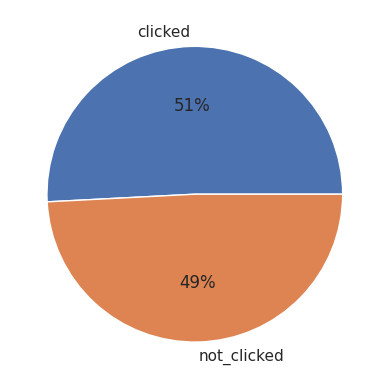

In [ ]:
y_ = Y.value_counts()
labels = ["clicked","not_clicked"]
plt.pie(y_, labels=labels, autopct='%1.0f%%')
plt.show()

In [ ]:
Y_Test.value_counts()

,count
Clicked on Ad,
0,1017
1,983


###  Logistic regression before oversampling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
logistic_model = LogisticRegression(random_state=1)
#outputs for every model
model1 = model_report(logistic_model,X,Y,X_Test,Y_Test, "Logistic Regression")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model1

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Logistic Regression,0.737516,0.738,0.709054,0.745455,0.726799,0.737516,0.47542


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
#outputs for every model
model2 = model_report(tree_model,X,Y,X_Test,Y_Test, " Decision Tree")
model2

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Decision Tree,0.793432,0.7935,0.78942,0.790224,0.789822,0.793432,0.586874


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators = 1000,
                             max_depth = 9,
                             criterion = "gini")
#forest_model.fit(x_train,y_train)
#outputs for every model
model3 = model_report(forest_model,X,Y,X_Test,Y_Test, "Random Forest")
model3

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Random Forest,0.798617,0.7995,0.746694,0.828442,0.785447,0.798617,0.598221


### XGBOOST

In [ ]:
from xgboost import XGBClassifier
scale_pos_weight=1
# y1=Y[Y==1].count()
# y0=Y[Y==0].count()
# if(y1>y0):
#   scale_pos_weight=(y1/y0)
# else:
#   scale_pos_weight=(y0/y1)

xgb_model = XGBClassifier( booster='gbtree',
                 gamma=0, learning_rate=0.1,
                    max_depth = 20, min_child_weight=1,
                    n_jobs=1,  objective='binary:logistic',
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=scale_pos_weight,n_estimators=500)



# xgb_model.fit(x_train,y_train)
#outputs for every model
model5 = model_report(xgb_model,X,Y,X_Test,Y_Test, "XGBOOST")
model5

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,XGBOOST,0.844481,0.8445,0.843337,0.840771,0.842052,0.844481,0.688926


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
model6= model_report(knn,X,Y,X_Test,Y_Test,
                      "KNN Classifier")
model6

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,KNN Classifier,0.734076,0.734,0.738555,0.725275,0.731855,0.734076,0.468009


### GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None)
model7 = model_report(gnb,X,Y,X_Test,Y_Test,
                      "Naive Bayes")
model7

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Naive Bayes,0.739667,0.741,0.661241,0.778443,0.715072,0.739667,0.480543


### LightGBM

In [ ]:
learning_rate = 0.1
num_leaves = 15
min_data_in_leaf = 2000
feature_fraction = 0.6
num_boost_round = 10000
params = {"objective": "binary",
          "boosting_type": "gbdt",
          "learning_rate": learning_rate,
          "num_leaves": num_leaves,
           "max_bin": 256,
          "n_estimators": 500,

          }
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier(**params)
model10 = model_report(lgbm_c,X,Y,X_Test,Y_Test,
                      "LGBM Classifier")
model10

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3934, number of negative: 4066
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1168
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491750 -> initscore=-0.033003
[LightGBM] [Info] Start training from score -0.033003


,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,LGBM Classifier,0.86252,0.8625,0.863683,0.857576,0.860618,0.86252,0.724953


## Summary withouthandling Imbalance

In [ ]:
#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model5,model6,
                                model7,
                                model10],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

In [ ]:
model_performances

,Model,roc_auc_score,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Logistic Regression,0.737516,0.7380,0.709054,0.745455,0.726799,0.737516,0.475420
1,Decision Tree,0.793432,0.7935,0.789420,0.790224,0.789822,0.793432,0.586874
2,Random Forest,0.798617,0.7995,0.746694,0.828442,0.785447,0.798617,0.598221
3,XGBOOST,0.844481,0.8445,0.843337,0.840771,0.842052,0.844481,0.688926
4,KNN Classifier,0.734076,0.7340,0.738555,0.725275,0.731855,0.734076,0.468009
5,Naive Bayes,0.739667,0.7410,0.661241,0.778443,0.715072,0.739667,0.480543
6,LGBM Classifier,0.862520,0.8625,0.863683,0.857576,0.860618,0.862520,0.724953
